<a href="https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html">Wine Data Description</a>

- 1) 불휘발산 (타타르산 tartaric acid - g / dm^3)
    - fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- 2) 휘발산 (아세트산 acetic acid - g / dm^3)
    - volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- 3) 시트르산 (g / dm^3)
    - citric acid  - found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- 4) 잔여 당 (g / dm^3)
    - residual sugar - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- 5) 염화나트륨 (와인에 포함된 소금) (sodium chloride - g / dm^3)
    - chlorides - the amount of salt in the wine
- 6) 유리 이산화 황 (mg / dm^3)
    - free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- 7) 총 이산화 황 (mg / dm^3)
    - total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- 8) 밀도 (g / cm^3)
    - density - the density of water is close to that of water depending on the percent alcohol and sugar content
- 9) 산도
    - pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- 10) 황산칼륨 (potassium sulphate - g / dm3)
    - sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- 11) 알콜 (% by volume)
    - alcohol - the percent alcohol content of the wine
- 12) 품질 (0 에서 10 사이의 점수)
    - quality - (score between 0 and 10) (Target)

# Scenario

일반적으로 와인의 가격이 정해질때, 많은 factor의 영향을 많이 받는다.</br>
ex) 포도품종, 생산지, 그해의 포도수확량, 생산량, 오크통에서의 생산여부 등...

우리가 흔히 말하는 가성비 좋은 와인도 분명히 존재한다. (비싸다고 무조건 좋은 와인이 아니다.)

좋은 와인을 알기위해, 앞서 말한 가격에 영향을 주는 factor들은 제외하고.

각 와인을 분석/ 측정하여, 와인의 품질을 알아보기로 하였다.

---
'와인의 품질'이 우리가 알고 싶어하는 값(target value)이고, 0에서 10사이의 점수를 사용하기로 하였다.

와인의 품질을 측정하기위해 사용된 특성들은, 맨 위에서 확인 할 수 있다.

In [1]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# DataSet 불러오기 레드와인 데이터
red = pd.read_csv('winequality-red.csv', sep=';') # comma 대신 semi colon으로 데이터가 구분되어있다.
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> 결측치 없고, 모두 숫자형 데이터, 따로 인코딩을 할 필요도 없겠다.

In [4]:
red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
target = 'quality'
features = red.columns.drop(target)

## 기준모델

In [6]:
# baseline 기준모델
guess = red['quality'].mean()
print('품질점수 평균 :', guess)
# 기준모델 평가모델  MAE
errors = red['quality'] - guess
mean_abs_errors = errors.abs().mean()
print('MAE :',mean_abs_errors)

품질점수 평균 : 5.6360225140712945
MAE : 0.6831779242889846


<AxesSubplot:xlabel='quality', ylabel='count'>

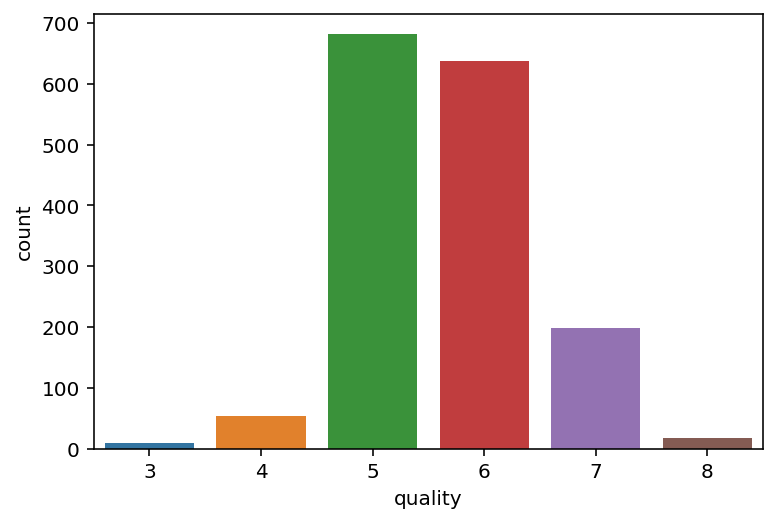

In [7]:
sns.countplot(x=red['quality'])

Normal Distribution(정규분포)의 형태와 비슷하지만. 5와, 6의 빈도가 다른 값들에 비해 너무 많은것을 알 수 있다.

In [8]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(red, test_size=0.20, random_state=63)

train.shape, val.shape #훈련, 검증

((1279, 12), (320, 12))

In [9]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1279, 11), (1279,), (320, 11), (320,))

## XGBoost regressor Model

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [11]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', 
                         learning_rate=0.2,
                         n_jobs=-1,
                         n_estimators=1000, metrics="mae")

In [12]:
xg_reg.fit(X_train, y_train,
           eval_set=[(X_train, y_train), (X_val, y_val)],
           early_stopping_rounds=10,
           eval_metric='mae') # 평가지표로, mae 선택

[0]	validation_0-mae:4.10732	validation_1-mae:4.14468
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:3.28896	validation_1-mae:3.32428
[2]	validation_0-mae:2.63399	validation_1-mae:2.67102
[3]	validation_0-mae:2.11115	validation_1-mae:2.14754
[4]	validation_0-mae:1.69419	validation_1-mae:1.73011
[5]	validation_0-mae:1.36418	validation_1-mae:1.40557
[6]	validation_0-mae:1.11046	validation_1-mae:1.15095
[7]	validation_0-mae:0.912312	validation_1-mae:0.951197
[8]	validation_0-mae:0.76179	validation_1-mae:0.802223
[9]	validation_0-mae:0.650637	validation_1-mae:0.689889
[10]	validation_0-mae:0.570736	validation_1-mae:0.612683
[11]	validation_0-mae:0.518782	validation_1-mae:0.563449
[12]	validation_0-mae:0.486511	validation_1-mae:0.5327
[13]	validation_0-mae:0.465248	validation_1-mae:0.512331
[14]	validation_0-mae:0.45037	validation_1-mae:0.501303
[15]	validation_

XGBRegressor(learning_rate=0.2, metrics='mae', n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

In [13]:
#Train Data 
import math
pred_t = xg_reg.predict(X_train)
print('R^2 score', r2_score(y_train, pred_t))
print('MAE score', mean_absolute_error(y_train, pred_t)) #해석하기 제일 직관적이기 때문에 선택

R^2 score 0.5927876952867295
MAE score 0.40513136258248333


In [14]:
#Validation Data
import math
pred = xg_reg.predict(X_val)
print('R^2 score', r2_score(y_val, pred))
print('MAE score', mean_absolute_error(y_val, pred)) #해석하기 제일 직관적이기 때문에 선택

R^2 score 0.4421892930448479
MAE score 0.4732346348464489


## 평가지표 설명

### 기준모델 평가지표
- 품질점수 평균(mean) : 5.6360225140712945
- MAE : 0.6831779242889846

### XGB Regressor 평가지표
(상관계수) R^2 score : 

- 0% represents a model that does not explain any of the variation in the dependent variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
- 100% represents a model that explains all of the variation in the dependent variable around its mean.
---

- R^2 score: 데이터의 44.2% 정도만 regression model으로 설명 될 수 있다.
- MAE score : 리뷰점수의 오차가 0.47인데. 0에서 10사이의 값에서 0.47의 오차는 매우 큰 오차이다.
    - 기준모델 MAE : 0.6831779242889846 보다는 작은 MAE를 가지고 있기 때문에, 우리가 만든 모델은 기준모델보다는 나은 성능을 가지고 있다.

In [15]:
# Feature Importance
xg_reg.feature_importances_

array([0.04232625, 0.09700929, 0.0373702 , 0.0378709 , 0.04612606,
       0.04834731, 0.06392565, 0.04461881, 0.05550766, 0.10815831,
       0.41873953], dtype=float32)

In [16]:
feature_names = X_train.columns.tolist()

In [17]:
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

0.0428085 : 'fixed acidity',
0.09659182 : 'volatile acidity',
0.04574573 : 'citric acid',
0.04055567 : 'residual sugar',
0.0430534 : 'chlorides'
0.04213002 : 'free sulfur dioxide'
0.06661093 : 'total sulfur dioxide'
0.05348006 : 'density'
0.06484056 : 'pH'
0.1255223 : 'sulphates'
0.37866098 : 'alcohol'

## 모델 개선시도 : 실패

Feature Importance가 제일 높은 feature 3가지만 이용

In [18]:
features_2 = ['alcohol','sulphates','volatile acidity']

In [19]:
X_train_2 = train[features_2]
y_train = train[target]

X_val_2 = val[features_2]
y_val = val[target]

In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data_dmatrix_2 = xgb.DMatrix(data=X_train_2, label=y_train)

In [21]:
xg_reg_2 = xgb.XGBRegressor(objective = 'reg:squarederror', 
                         learning_rate=0.2,
                         n_jobs=-1,
                         n_estimators=1000, metrics="r2")

In [22]:
xg_reg_2.fit(X_train_2, y_train,
           eval_set=[(X_train_2, y_train), (X_val_2, y_val)],
           early_stopping_rounds=10,
           eval_metric='mae') # 평가지표로, mae 선택

[0]	validation_0-mae:4.10732	validation_1-mae:4.14468
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:3.28852	validation_1-mae:3.32545
[2]	validation_0-mae:2.63363	validation_1-mae:2.67231
[3]	validation_0-mae:2.11061	validation_1-mae:2.14818
[4]	validation_0-mae:1.69468	validation_1-mae:1.73399
[5]	validation_0-mae:1.36731	validation_1-mae:1.40443
[6]	validation_0-mae:1.11401	validation_1-mae:1.1502
[7]	validation_0-mae:0.918373	validation_1-mae:0.951523
[8]	validation_0-mae:0.767915	validation_1-mae:0.800056
[9]	validation_0-mae:0.65708	validation_1-mae:0.68664
[10]	validation_0-mae:0.579704	validation_1-mae:0.608621
[11]	validation_0-mae:0.530028	validation_1-mae:0.56042
[12]	validation_0-mae:0.503231	validation_1-mae:0.532989
[13]	validation_0-mae:0.485176	validation_1-mae:0.516817
[14]	validation_0-mae:0.475972	validation_1-mae:0.506861
[15]	validation_

XGBRegressor(learning_rate=0.2, metrics='r2', n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

In [23]:
#Train Data 
import math
pred_t_2 = xg_reg_2.predict(X_train_2)
print('R^2 score', r2_score(y_train, pred_t_2))
print('MAE score', mean_absolute_error(y_train, pred_t_2)) #해석하기 제일 직관적이기 때문에 선택

R^2 score 0.4639149058040696
MAE score 0.46210958679921


In [24]:
#Validation Data
import math
pred_2 = xg_reg_2.predict(X_val_2)
print('R^2 score', r2_score(y_val, pred_2))
print('MAE score', mean_absolute_error(y_val, pred_2)) #해석하기 제일 직관적이기 때문에 선택

R^2 score 0.397212635187403
MAE score 0.4952975109219551


### 기준모델
- 품질점수 평균(mean) : 5.6360225140712945
- MAE : 0.6831779242889846

---
### 개선시도 전
#### 훈련
- R^2 score : 0.5927876952867295
- MAE score : 0.40513136258248333

#### 검증
- R^2 score : 0.4421892930448479
- MAE score : 0.4732346348464489

---
### 개선시도 후
#### 훈련
- R^2 score : 0.4639149058040696
- MAE score : 0.46210958679921
#### 검증
- R^2 score : 0.397212635187403
- MAE score : 0.4952975109219551

---
가장 높은 중요도를 가진 feature 3개만 이용하여 모델을 만들어 성능을 확인해 보았는데 성능이 더 떨어졌다...

R2 score는 감소 하였고 Mean Absolute Error 는 더욱 증가하였다.

#### 실패요인
데이터의 크기가 크지 않은데 (샘플의 수가 부족), 모델이 학습할 특성의 수를 제거하니 모델의 성능 저하로 이어진것 같다.

더 좋은 성능을 내기 위해선, Random Search CV + Grid Search CV를 이용한 Hyper Parameter Tuning 사용하거나,
AdaBoost, LightBGM 같은 다른 모델을 사용해보아야겠다.

## PDP Box : 단독 feature 해석

In [25]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature='alcohol'

In [26]:
isolated = pdp_isolate(
    model=xg_reg, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)

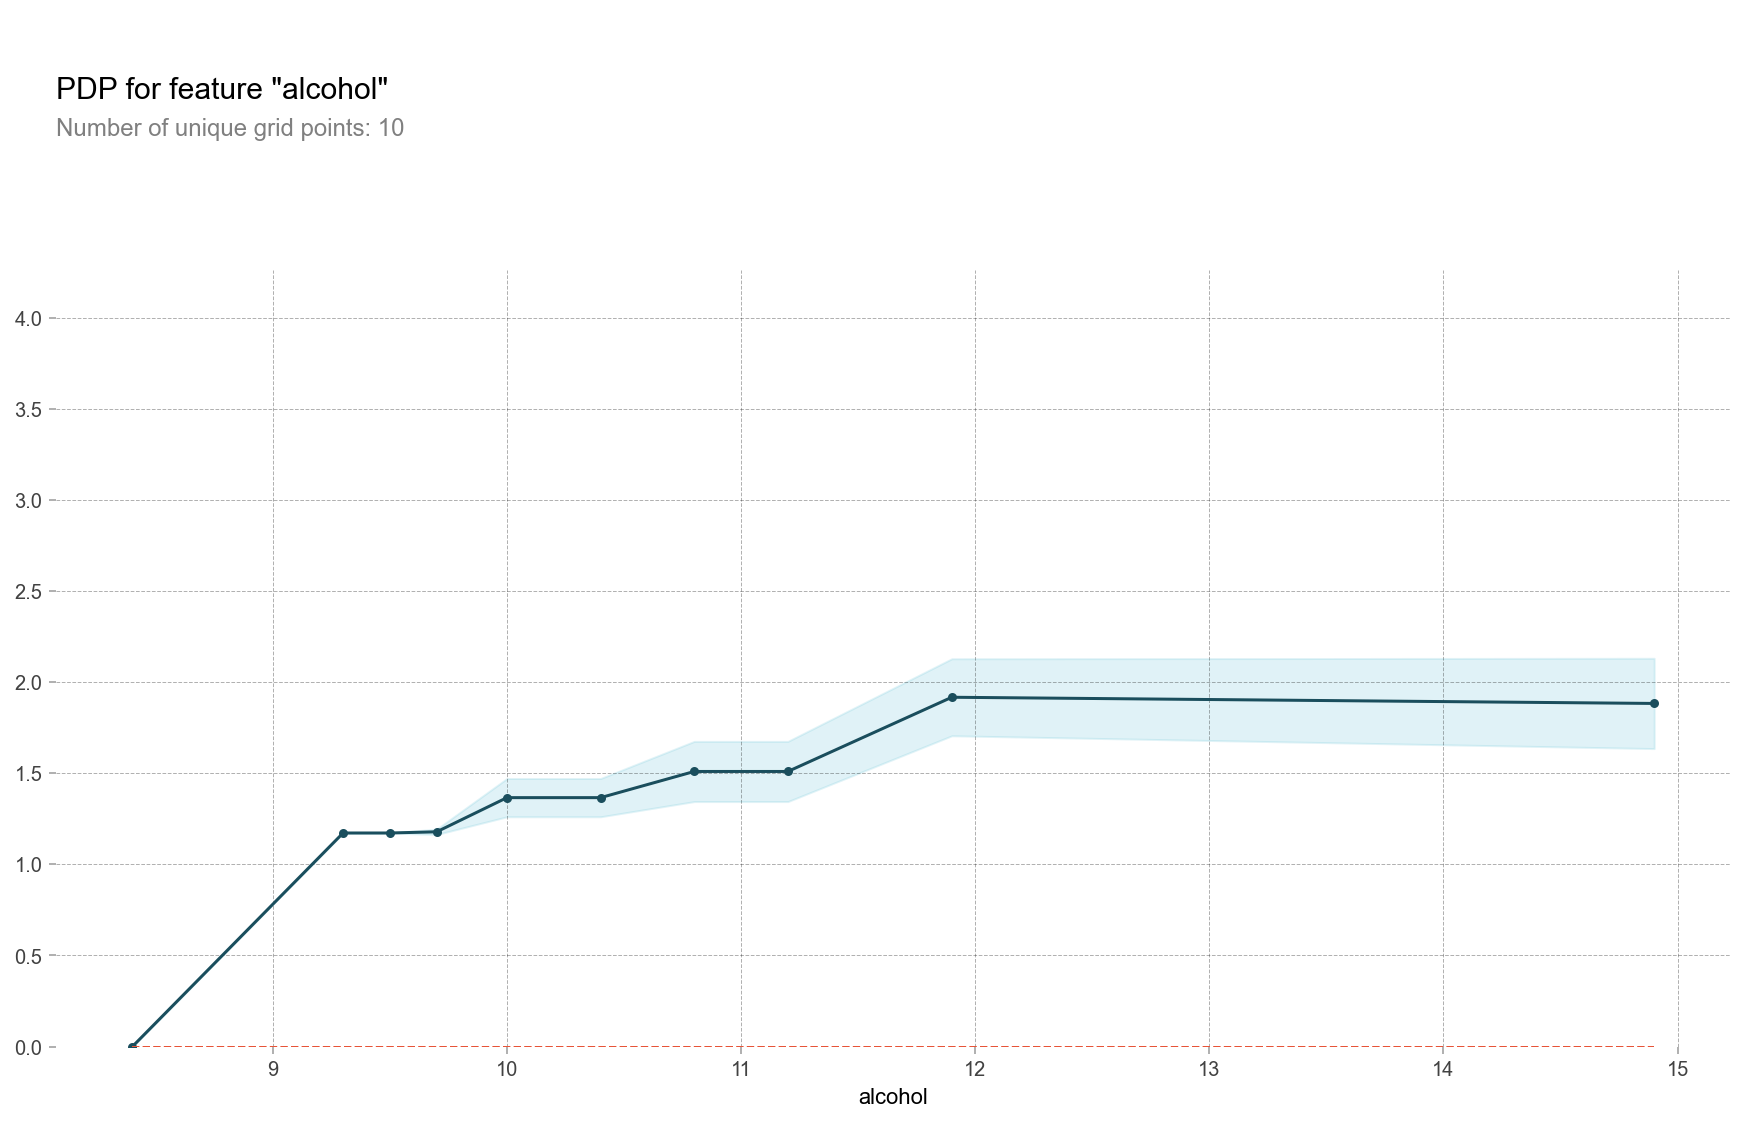

In [27]:
pdp_plot(isolated, feature_name=feature);

알콜이 0%에서 12%까지는 Quality에 증가하는 영향을 주지만, 12%이후 에는 그렇게 큰 임팩트를 주지는 않았다.
 - 일반적으로 와인의 알콜 도수가 12%인것을 고려해 보았을때, '기준치'에 미치지 못하는 와인들은, 좋은 리뷰 점수를 받지 못한다고 보면 되겠다.

## feature와 feature의 사이의 상관관계

In [28]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['alcohol', 'residual sugar']

interaction = pdp_interact(
    model=xg_reg, 
    dataset=X_train,
    model_features=X_train.columns, 
    features=features
)

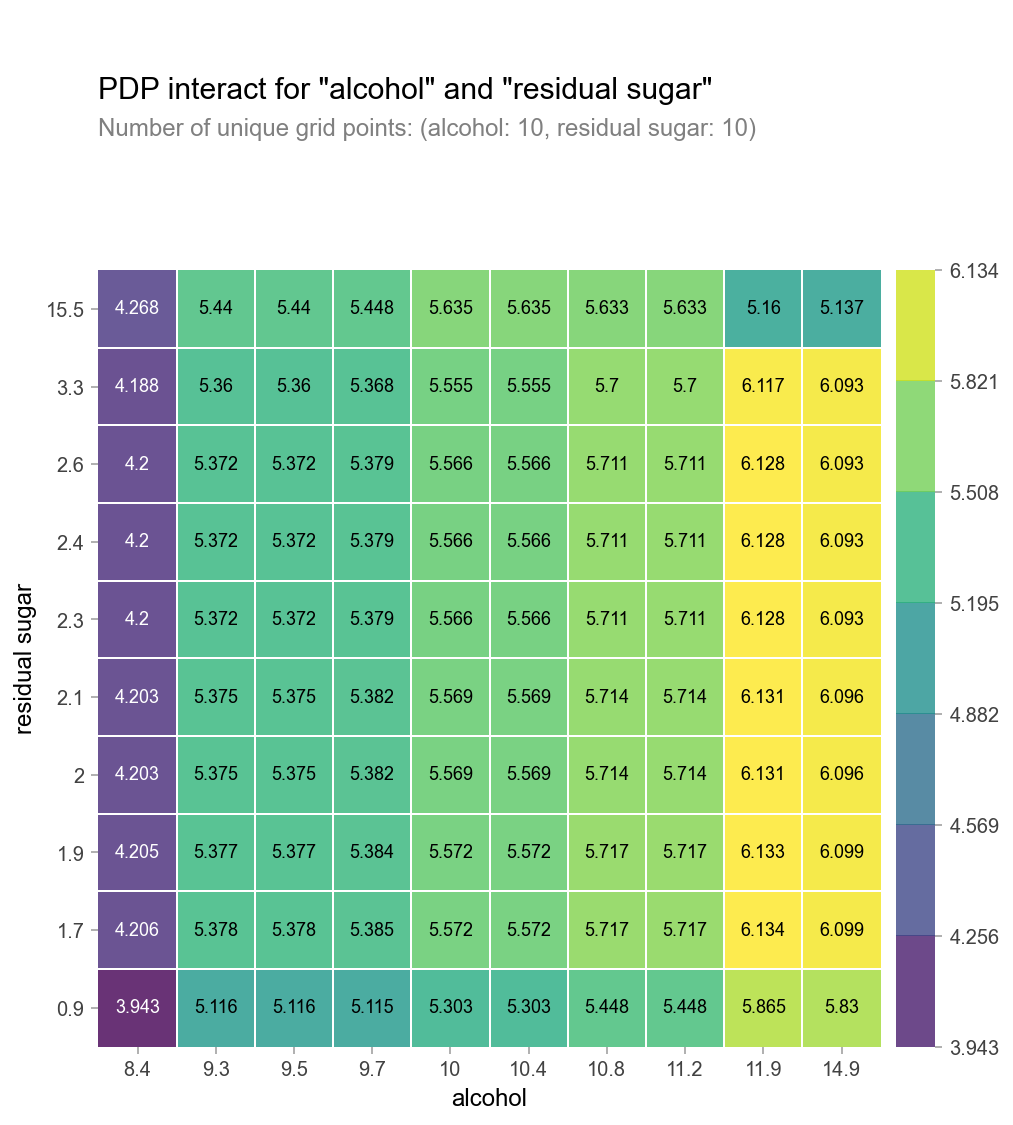

In [29]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

#### 와인에 포함된 알콜은 포도에 포함되어있는 당분을 효모가 분해하면서 알콜이 만들어진다.

- y 축은 와인에 있는 분해되지 않고 남은 설탕/당을 의미하고
- x 축은 와인에 있는 알콜 도수를 의미한다

>가장 낮은 quality score -> low alcohol & low residual sugar </br>
>가장 높은 quality score -> alcohol 11.9 & resifual sugar 1.7 (알콜 11.9% 이상은 점수가 낮아 진다.) 1.7 < 잔여당 < 3.3 = quality score 6점이상을 유지하고 있다.

## SHAP를 이용한 각 sample의 시각화

In [30]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_train)

In [31]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[507,:], X_train.iloc[0,:])
# shape_values의 숫자를 0에서 1279사이의 값으로 수정하면, 각 sample이 해당하는 quality score를 받았는지 나온다.

In [32]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [33]:
# visualize the training set predictions
shap_values_2 = explainer.shap_values(X_val)
shap.force_plot(explainer.expected_value, shap_values_2, X_val)

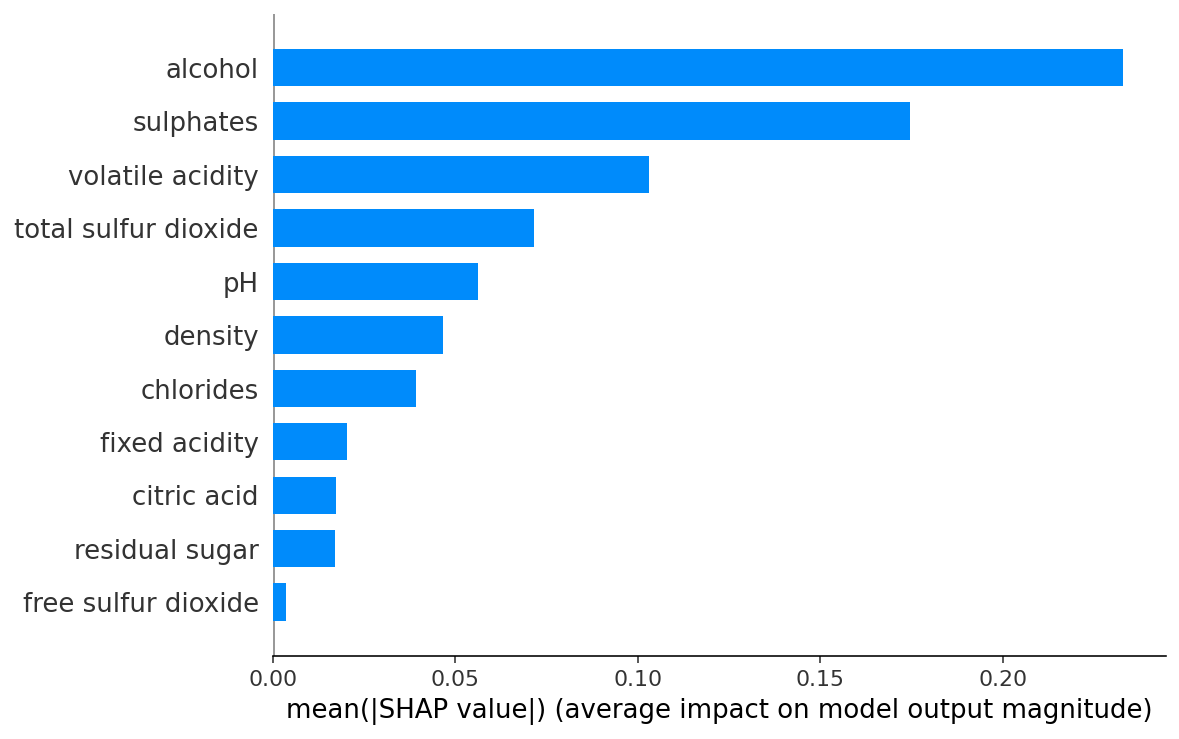

In [34]:
#shows feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")